### Introduction
In this project, I build a machine learning model to predict whether or not patients in the Pima Indians Diabetes Database have diabetes. This dataset contains various medical predictor variables, such as the number of pregnancies, BMI, insulin level, age, and more. Our goal is to use these features to accurately predict the onset of diabetes.

##### We will go through the following steps in this analysis:

###### Data Exploration: Understanding the dataset, its structure, and the distribution of variables.
###### Data Preprocessing: Cleaning, handling missing values, and preparing the data for modeling.
##### Exploratory Data Analysis (EDA): Visualizing relationships between variables and gaining insights.
##### Feature Selection: Identifying the most relevant features for our prediction task.
##### Model Selection: Choosing appropriate machine learning algorithms for our classification problem.
##### Model Training: Training and fine-tuning the selected models.
##### Model Evaluation: Assessing model performance using various evaluation metrics.
##### Conclusion: Summarizing our findings and the predictive model's effectiveness.
Let's begin our journey into predicting diabetes onset!

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer

In [2]:
# Load the dataset
df = pd.read_csv("diabetes.csv")

### Data Exploration 

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# df.columns: Returns a list of column names in the DataFrame 'df'.
df.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [7]:
# df.describe().T: Transposes the output of the describe() method, which provides summary statistics,
# turning rows into columns and columns into rows.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Handling Zero Minimum Values in the Dataset
The summary statistics for this dataset reveal that some variables, such as "Glucose," "BloodPressure," "SkinThickness," "Insulin," "BMI," and "DiabetesPedigreeFunction," have minimum values of zero. In the context of a diabetes dataset, this raises concerns and requires investigation.

In [8]:
# List of columns with zero values that need to be changed
columns_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Replace zero values with NaN (for example)
df[columns_with_zeros] = df[columns_with_zeros].replace(0, float('nan'))

In [9]:
# Verify that zero values have been replaced with NaN
print("Updated DataFrame:")
df.head()

Updated DataFrame:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [10]:
# Save the modified dataset to a new file
# Replace 'modified_dataset.csv' with your desired file name
df.to_csv('modified_dataset.csv', index=False)

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
# quickly assess the extent of missing data in each column of the DataFrame.
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Handling Missing Values in the Dataset
The dataset contains missing values in several columns, as indicated by the counts of missing values shown above. It's important to address these missing values appropriately to ensure the quality of your analysis and modeling


In [13]:
# List of columns with missing values to be imputed (numerical columns)
columns_to_impute = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Create an imputer object for mean or median imputation (choose one)
# imputer = SimpleImputer(strategy='mean')  # Use mean for imputation
imputer = SimpleImputer(strategy='median')  # Use median for imputation

# Impute missing values in the specified columns
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# Verify that there are no missing values remaining
missing_values_count = df.isnull().sum().sum()
print(f"Total Missing Values After Imputation: {missing_values_count}")

# Continue with data exploration, preprocessing, and analysis

Total Missing Values After Imputation: 0


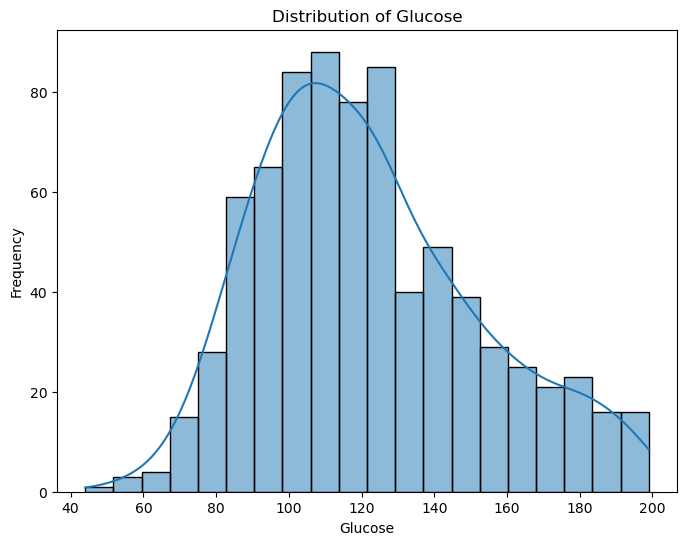

In [14]:
# Example: Histogram of Glucose
plt.figure(figsize=(8, 6))
sns.histplot(df['Glucose'], bins=20, kde=True)
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Distribution of Glucose')
plt.show()

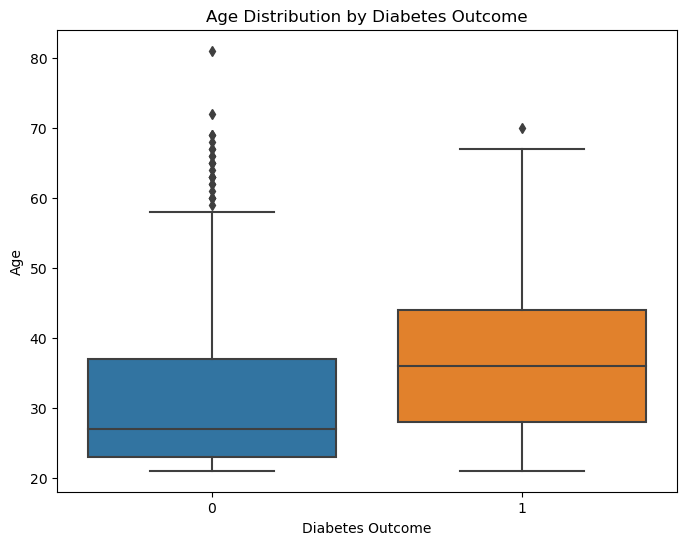

In [15]:
# Example: Box plot to visualize outliers in Age
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Age', data=df)
plt.xlabel('Diabetes Outcome')
plt.ylabel('Age')
plt.title('Age Distribution by Diabetes Outcome')
plt.show()

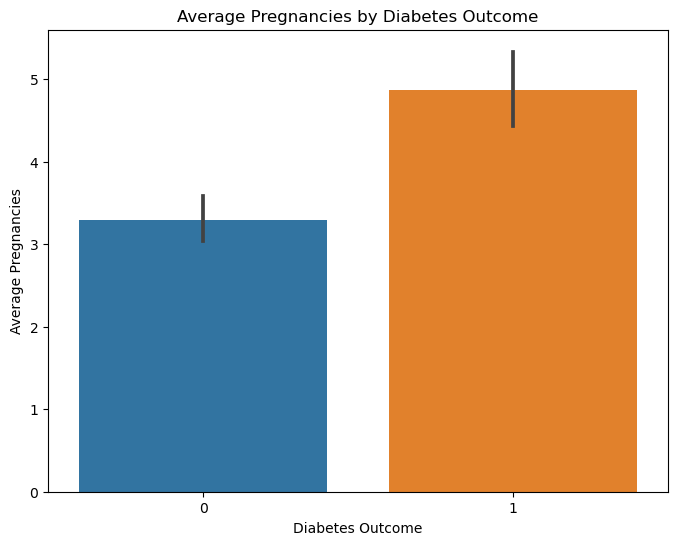

In [16]:
# Example: Bar plot of pregnancies by diabetes outcome
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='Pregnancies', data=df)
plt.xlabel('Diabetes Outcome')
plt.ylabel('Average Pregnancies')
plt.title('Average Pregnancies by Diabetes Outcome')
plt.show()

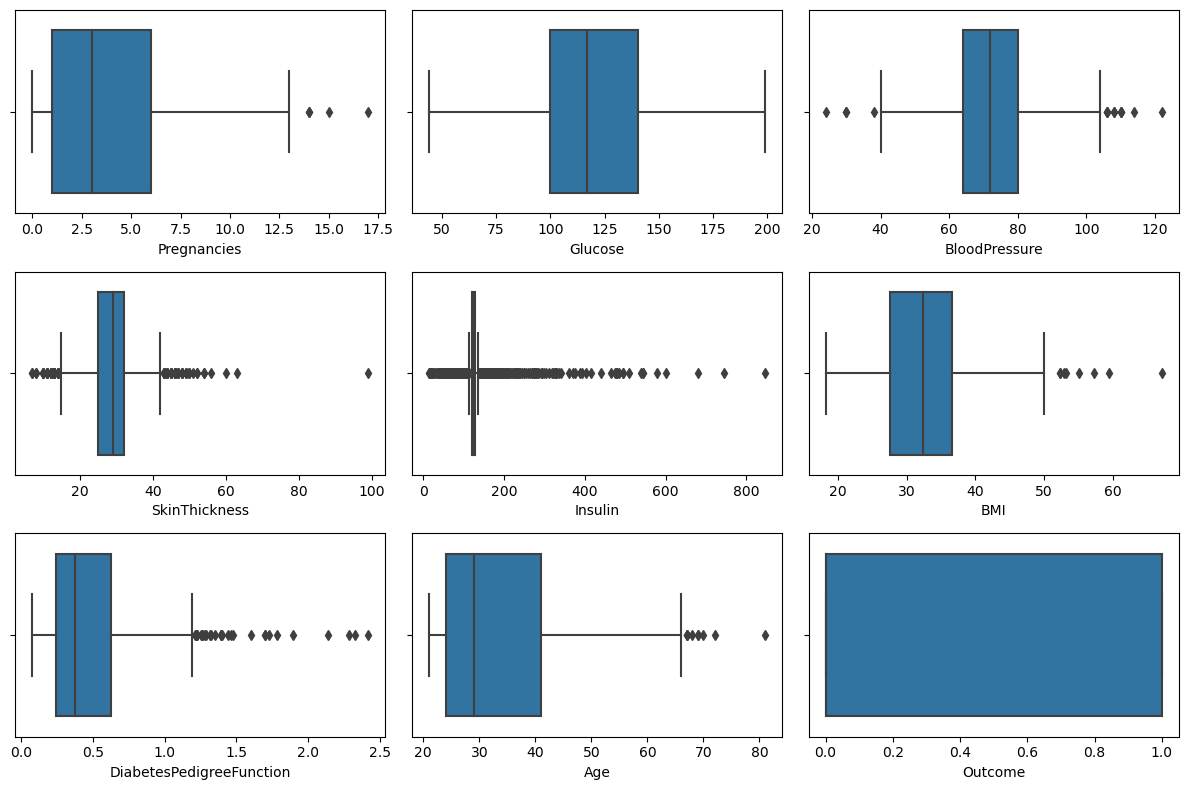

In [17]:
# Create a box plot for each numerical feature
numerical_columns = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Create a Min-Max scaler object
scaler = MinMaxScaler()

# Define the features to be scaled (numerical columns)
features_to_scale = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Apply Min-Max scaling to the selected features
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Check the scaled data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1


In [19]:
from sklearn.preprocessing import MinMaxScaler

# Create a Min-Max scaler object
scaler = MinMaxScaler()

# Define the features to be scaled (numerical columns)
features_to_scale = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Apply Min-Max scaling to the selected features
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Check the scaled data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1


### Data Preprocessing:

In [20]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Exploratory Data Analysis (EDA):


Exploratory Data Analysis:


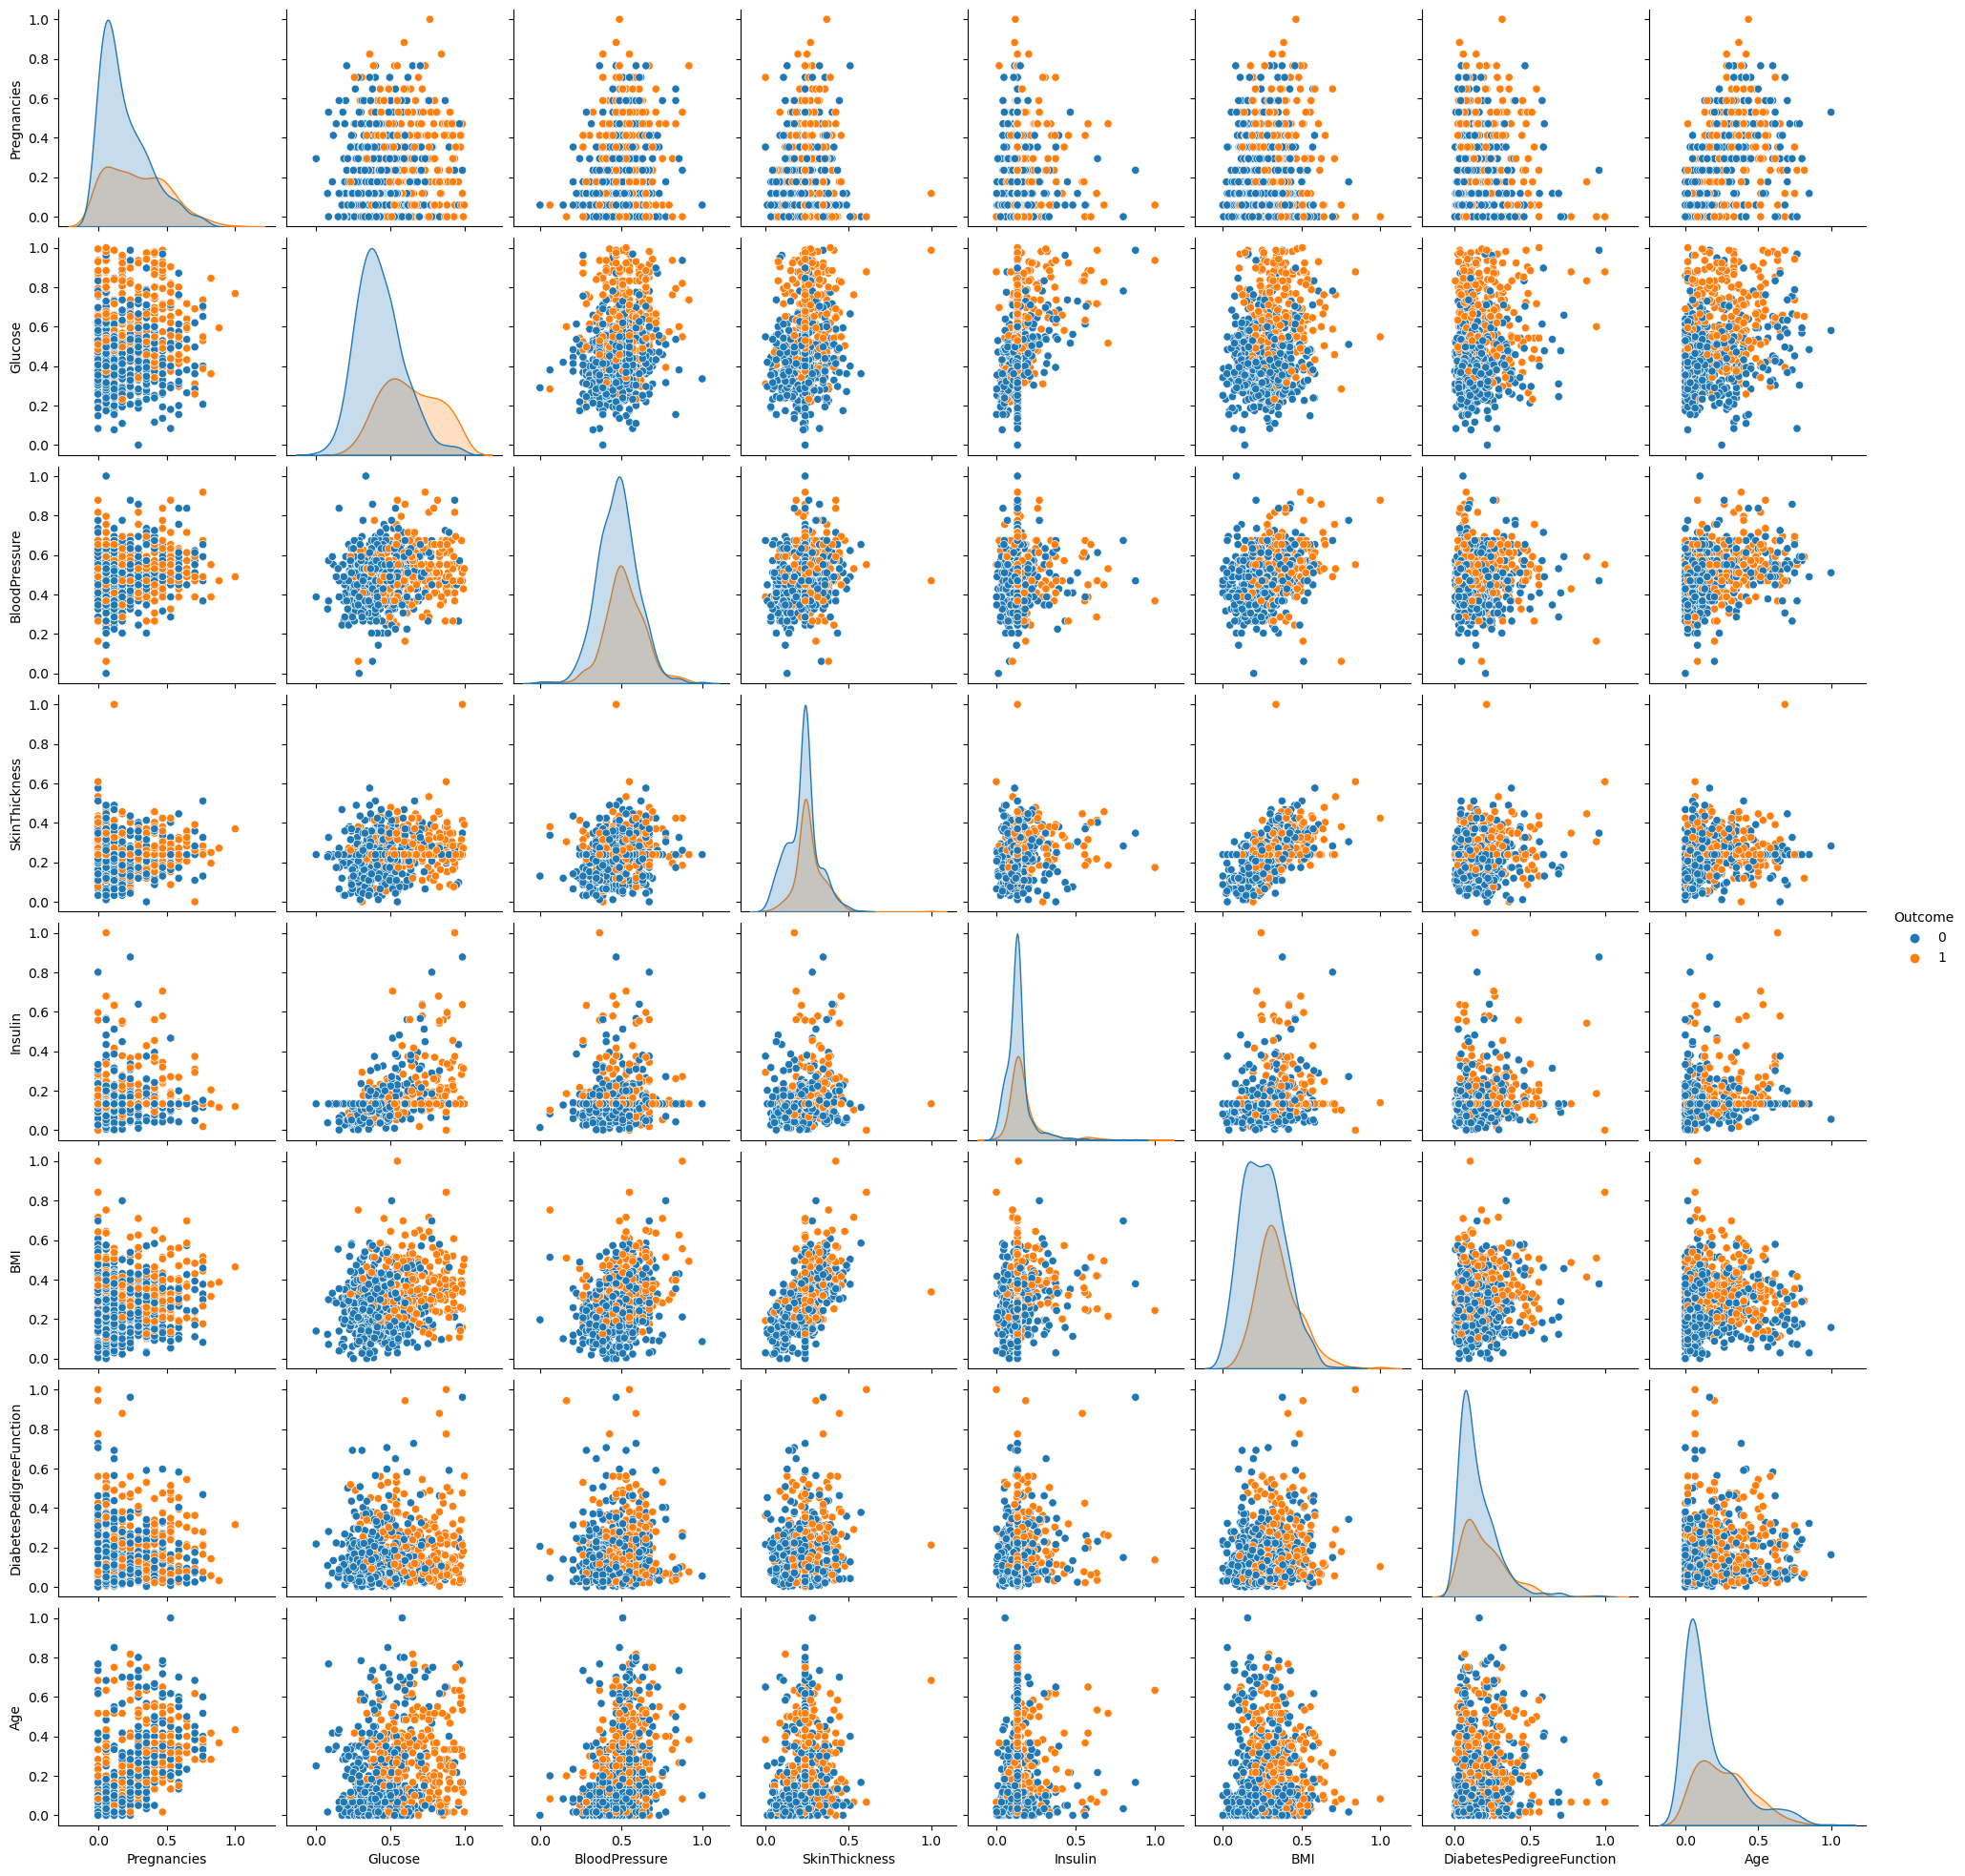

In [21]:
# Exploratory Data Analysis (EDA)
print("\nExploratory Data Analysis:")
sns.pairplot(df, hue="Outcome")
plt.show()

In [22]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


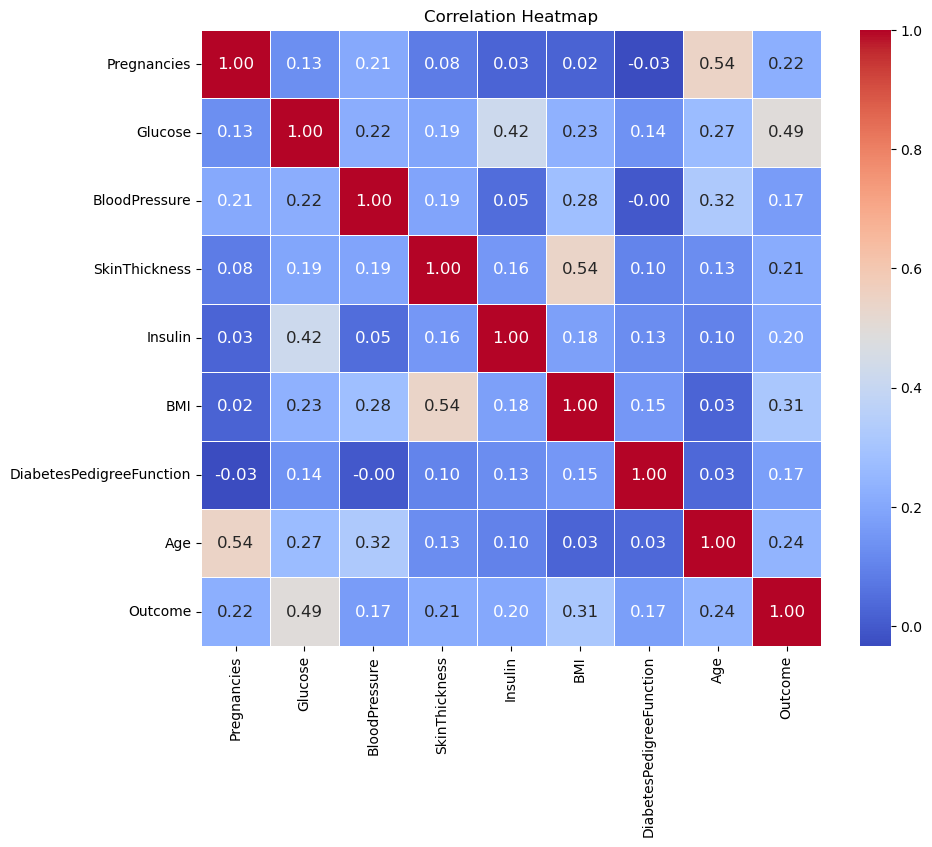

In [23]:
# Create a correlation matrix
corr_matrix = df.corr()

# Set up the heatmap figure
plt.figure(figsize=(10, 8))

# Create the heatmap with added decorations
sns.heatmap(
    corr_matrix,
    annot=True,            # Show numerical values in each cell
    cmap='coolwarm',       # Color map (you can choose other color maps)
    linewidths=0.5,        # Add lines between cells
    fmt=".2f",             # Format for annotations (2 decimal places)
    annot_kws={"size": 12} # Font size for annotations
)

# Set the title
plt.title("Correlation Heatmap")

# Customize axis labels
plt.xticks(rotation=90)   # Rotate x-axis labels for better readability
plt.yticks(rotation=0)    # Keep y-axis labels horizontal

# Show the plot
plt.show()


In [24]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into a training set and a test set (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,0.117647,0.258065,0.489796,0.239130,0.133413,0.288344,0.096499,0.000000
618,0.529412,0.438710,0.591837,0.184783,0.133413,0.204499,0.514091,0.483333
346,0.058824,0.612903,0.224490,0.130435,0.082933,0.214724,0.245944,0.016667
294,0.000000,0.754839,0.265306,0.239130,0.133413,0.075665,0.075149,0.733333
231,0.352941,0.580645,0.571429,0.326087,0.427885,0.572597,0.068318,0.416667


In [26]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,0.352941,0.348387,0.346939,0.282609,0.211538,0.323108,0.150299,0.366667
324,0.117647,0.438710,0.520408,0.271739,0.133413,0.357873,0.029889,0.000000
624,0.117647,0.412903,0.408163,0.239130,0.133413,0.257669,0.034159,0.000000
690,0.470588,0.406452,0.571429,0.239130,0.133413,0.130879,0.332195,0.216667
473,0.411765,0.593548,0.673469,0.239130,0.133413,0.239264,0.056362,0.483333


In [27]:
y_train.head()

60     0
618    1
346    0
294    0
231    1
Name: Outcome, dtype: int64

In [28]:
y_test.head()

668    0
324    0
624    0
690    0
473    0
Name: Outcome, dtype: int64

### 6.Feature Selection:

#### After conducting an exploratory data analysis (EDA) and examining the correlation between features in our dataset, it has been determined that there is no significant correlation between the features. As a result, the decision has been made to not perform feature selection for this project.


### 7.Model Selection and Training:

In [29]:
from sklearn.neighbors import KNeighborsClassifier

# Create a kNN classifier with a specified number of neighbors (e.g., k=5)
k = 11
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize lists to store training and testing scores
test_scores = []
train_scores = []

# Initialize variables to store the maximum scores and corresponding k values
max_train_score = 0
max_test_score = 0
best_k_train = 0
best_k_test = 0

# Loop through different values of k
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate and store the training and testing scores
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    # Check if the current score is the maximum for training data
    if train_score > max_train_score:
        max_train_score = train_score
        best_k_train = k
    
    # Check if the current score is the maximum for testing data
    if test_score > max_test_score:
        max_test_score = test_score
        best_k_test = k

print(f"Max training score: {max_train_score:.2f} for k = {best_k_train}")
print(f"Max testing score: {max_test_score:.2f} for k = {best_k_test}")

Max training score: 1.00 for k = 1
Max testing score: 0.80 for k = 14


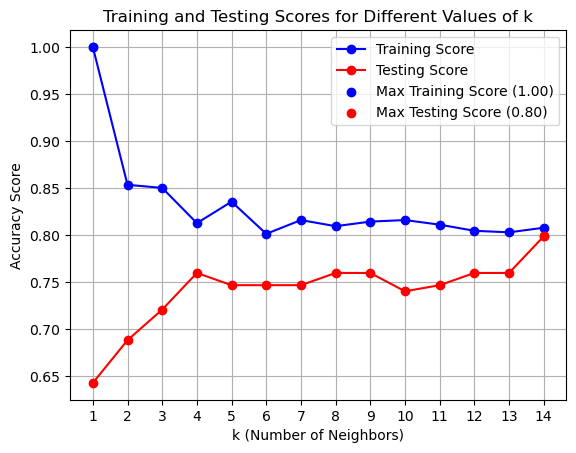

In [31]:
import matplotlib.pyplot as plt

# Values of k for the x-axis
k_values = range(1, 15)

# Plot training scores in blue
plt.plot(k_values, train_scores, marker='o', label='Training Score', color='blue')

# Plot testing scores in red
plt.plot(k_values, test_scores, marker='o', label='Testing Score', color='red')

# Highlight the maximum training score
plt.scatter(best_k_train, max_train_score, color='blue', marker='o', label=f'Max Training Score ({max_train_score:.2f})')

# Highlight the maximum testing score
plt.scatter(best_k_test, max_test_score, color='red', marker='o', label=f'Max Testing Score ({max_test_score:.2f})')

# Add labels and title
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy Score')
plt.title('Training and Testing Scores for Different Values of k')
plt.xticks(k_values)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,accuracy_score, confusion_matrix

# Set k to 14
k = 14

# Create a kNN classifier with k=14
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data with selected features
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with k = {k}: {accuracy:.2f}')

# Generate a classification report with precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print(report)

# Calculate ROC-AUC score
y_prob = knn_classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC-AUC Score with k = {k}: {roc_auc:.2f}')

Accuracy with k = 14: 0.80
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        99
           1       0.77      0.62      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154

ROC-AUC Score with k = 14: 0.82


In [40]:
from mlxtend.plotting import plot_decision_regions

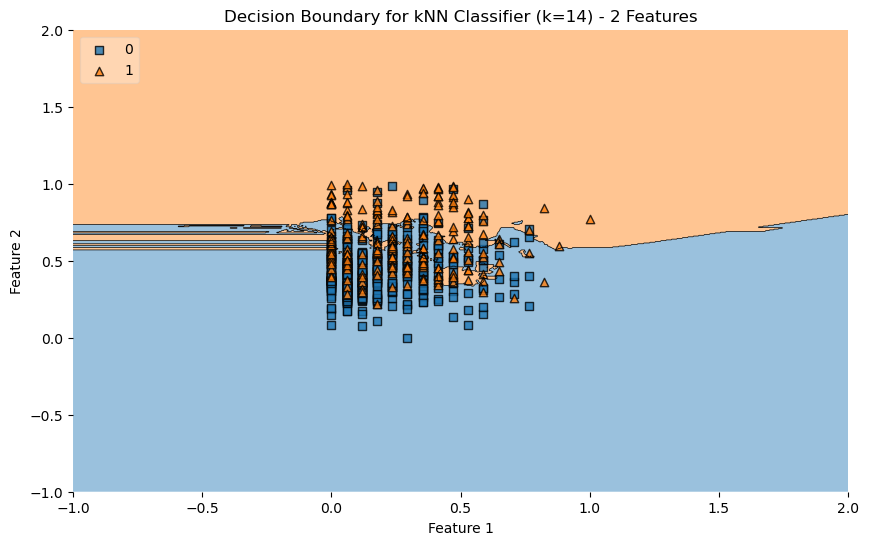

In [41]:
# Plot the decision boundary using two specific features (e.g., Feature 1 and Feature 2)
feature1_index = 0  # Replace with the index of your selected feature
feature2_index = 1  # Replace with the index of your second selected feature

# Create a new kNN classifier with k=14 and only 2 features
knn_classifier_2d = KNeighborsClassifier(n_neighbors=14)
X_train_2d = X_train.iloc[:, [feature1_index, feature2_index]]
knn_classifier_2d.fit(X_train_2d, y_train)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_2d.values, y_train.values, clf=knn_classifier_2d, legend=2)
plt.xlabel(f'Feature {feature1_index + 1}')
plt.ylabel(f'Feature {feature2_index + 1}')
plt.title(f'Decision Boundary for kNN Classifier (k=14) - 2 Features')
plt.show()

### Model Prediction:

In [42]:
# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

### Model Evaluation:

In [43]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report with precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        99
           1       0.77      0.62      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



### Hyperparameter Tuning:

In [44]:
from sklearn.model_selection import GridSearchCV

# Define a range of k values to search
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best k value
best_k = grid_search.best_params_['n_neighbors']
print(f'Best k value: {best_k}')

Best k value: 15


ROC-AUC Score: 0.82


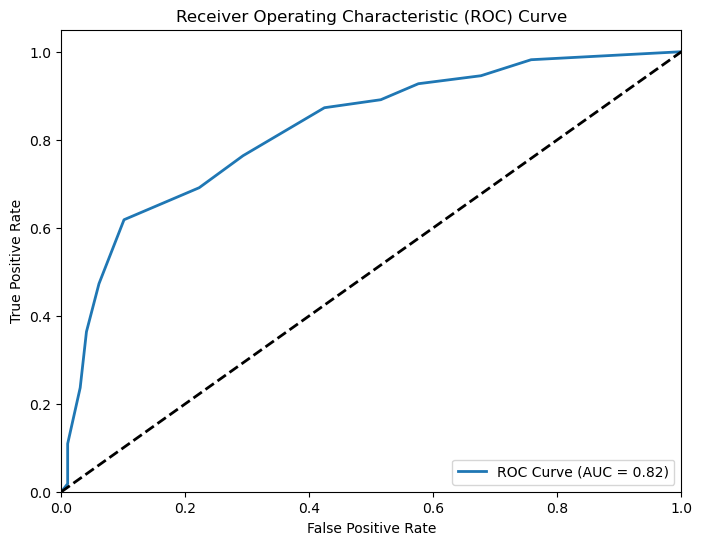

In [45]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate the predicted probabilities for class 1 (positive class)
y_prob = knn_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [46]:
File_path = 'C:\Users\Reena\Desktop/df.csv'
df.to_csv(file_path, index=False)
print(f"Clean dataset has been exported to {file_path}")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2920639106.py, line 1)